### Case Study 4 :  Data Science Shark Tank

***Due Date: December 3, 2025 before 11:59pm***

Note: 
    
***part_1 and part_3 of Problem_1, and links to datasets (or API you are planning to use) should be sent to me by email (tghoshal@wpi.edu) before 11:59pm on November 11. Without this step, your project may not be approved for presentation on April 23.You must CC all your group members in that email.***

***On November 13, we will have an 'Elevator Pitch' session.*** 

also NOTE: 

1. There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

2. We may collect feedback after your submission to understand everyone's contributions. The feedback may affect your grade.


In [49]:
'''





'''

'\n\n\n\n\n\n'

### Introduction

After the previous 3 case studies,  your are now equipped with three powerful skills of an effective data scientist: ***data gathering, model development, exploratory data analysis***. In this case study, your team is going to act like a data science team in a mid-size company. Your team will make use of these skills to come up with an idea for a new data science project, covince senior executives of the idea to get funding/ financial resources using data driven presentations, and finally build a prototype model for use by another team within the company. 

Your team needs to decide which business problem is important for the market your company is in (for example, social media market, housing market, search market, etc.). Then use data science approaches to gather data, explore the data, tie with business needs, make conjectures, develop models etc.

The solution should include some key components of data science: 

    1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how are you planning to persuade senior executives (e.g. seniors VPS/ CEO/ COO) to allocate money for your project
    
    2) collect data, perform exploratory data analysis, make conjectures in support of the business plan made in the previous step.
    
    3) Use one of your conjectures from step 2 as the motivation for developing a model. Use appropriate features from your data and build the model.

NOTE, as opposed to the first three case studies, case study 4 is much much more open ended. A more complex model does not mean a better project. Also, strong exploratory data analysis loosely tied with the business question also does not mean a better project. Try to make all parts coherent so that they collectively tell one story.

# Background (Elevator Pitch)

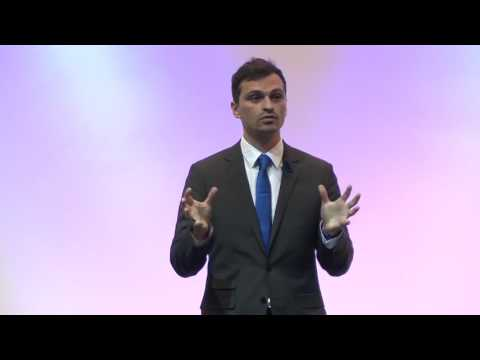

In [50]:
# Should your project presentation be like this?

from IPython.display import YouTubeVideo
YouTubeVideo("7a_lu7ilpnI") 

## Some Resources


**Optional Readings:** 


**APIs**
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition

**Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

**Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/datasets/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, https://www.data.gouv.fr/fr/, https://www.oecd.org/gov/digital-government/open-government-data.htm




### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on. Pick one of the markets for further consideration, and propose a new data science project which you believe will be important for your company to do well in the market. Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe your team can make use of data science methodologies to solve the problem?
How are you planing to persuade the senior executives to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:



2) Why the problem is important to solve? 


3) What is your idea to solve the problem? 


4) What differences you could make with your data science approach?


5) Why do you believe the idea deserves the financial resources of your company?






### Problem 2: Data Gathering, Exploratory Data Analysis, Make Conjectures (20 points)

Gather data in support of your responses for Problem 1. Use appropriate data analysis techniques to explore the data. Make conejectures in relation to problem 1. Find support for your conjectures using the data.

**Insert your answers in the cell below** 

**Add as many cells as needed**


If you are using an API to collect data, provide the code below.

If you collecting data from publicly available datasets, provide the links to them below.

In [51]:
# - Tristan - API key (newsAPI) - 78fc48a18a074927ab98ea7c487bfd4b

import pandas as pd
import numpy as np
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key='78fc48a18a074927ab98ea7c487bfd4b')
print(newsapi)

# can only get last 30 day of data without paying

In [52]:
#GDELT Global News - set up

from google.cloud import bigquery
import os


#import key file on Windows
#os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "D:\\Users\\Tris\\Downloads\\tsla-sentiment-608253418e5c.json"

#importing key file on Mac
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "tsla-sentiment-608253418e5c.json"


# https://console.cloud.google.com/welcome/new?project=tsla-sentiment
# https://huggingface.co/ProsusAI/finbert
# https://console.cloud.google.com/iam-admin/serviceaccounts?project=tsla-sentiment&supportedpurview=project


In [ ]:
START_DATE = 20220101
END_DATE   = 20241231

query_tsla_us_events = f"""
WITH base AS (
  SELECT
    DATE(
      PARSE_DATE('%Y%m%d', CAST(SQLDATE AS STRING))
    ) AS day,

    -- Core event-level sentiment / intensity
    AvgTone,
    GoldsteinScale,
    NumMentions,
    NumSources,
    NumArticles,

    -- Actors & URL
    LOWER(Actor1Name) AS a1_name,
    LOWER(Actor2Name) AS a2_name,
    SOURCEURL         AS url,

    ActionGeo_CountryCode AS action_country,

    -- Flags for TSLA
    (
      (LOWER(Actor1Name) LIKE '%tesla%') OR
      (LOWER(Actor2Name) LIKE '%tesla%') OR
      (LOWER(SOURCEURL)  LIKE '%tesla%')
    ) AS is_tsla_event,

    -- EV industry events (URL heuristic)
    (
      LOWER(SOURCEURL) LIKE '%electric-vehicle%'  OR
      LOWER(SOURCEURL) LIKE '%electric-vehicles%' OR
      LOWER(SOURCEURL) LIKE '%electric-car%'      OR
      LOWER(SOURCEURL) LIKE '%electric-cars%'     OR
      LOWER(SOURCEURL) LIKE '%ev-battery%'        OR
      LOWER(SOURCEURL) LIKE '%ev-industry%'       OR
      LOWER(SOURCEURL) LIKE '%battery-electric%'  OR
      LOWER(SOURCEURL) LIKE '%plug-in-hybrid%'
    ) AS is_ev_event,

    -- Macro / market-wide financial events
    (
      -- Fed / interest rates / yields
      LOWER(SOURCEURL) LIKE '%federal-reserve%'   OR
      LOWER(SOURCEURL) LIKE '%fomc%'              OR
      LOWER(SOURCEURL) LIKE '%interest-rate%'     OR
      LOWER(SOURCEURL) LIKE '%rate-hike%'         OR
      LOWER(SOURCEURL) LIKE '%rate-cut%'          OR
      LOWER(SOURCEURL) LIKE '%treasury-yield%'    OR
      LOWER(SOURCEURL) LIKE '%bond-yield%'        OR

      -- Inflation / CPI / prices
      LOWER(SOURCEURL) LIKE '%inflation%'         OR
      LOWER(SOURCEURL) LIKE '%cpi%'               OR
      LOWER(SOURCEURL) LIKE '%consumer-price%'    OR

      -- Jobs / unemployment
      LOWER(SOURCEURL) LIKE '%jobs-report%'       OR
      LOWER(SOURCEURL) LIKE '%payrolls%'          OR
      LOWER(SOURCEURL) LIKE '%nonfarm-payrolls%'  OR
      LOWER(SOURCEURL) LIKE '%unemployment-rate%' OR

      -- Growth / recession
      LOWER(SOURCEURL) LIKE '%gdp%'               OR
      LOWER(SOURCEURL) LIKE '%recession%'         OR
      LOWER(SOURCEURL) LIKE '%economic-growth%'   OR

      -- Broad stock market moves
      LOWER(SOURCEURL) LIKE '%stock-market%'      OR
      LOWER(SOURCEURL) LIKE '%wall-street%'       OR
      LOWER(SOURCEURL) LIKE '%market-rout%'       OR
      LOWER(SOURCEURL) LIKE '%market-rally%'
    ) AS is_macro_event

  FROM `gdelt-bq.gdeltv2.events`
  WHERE
    SQLDATE BETWEEN {START_DATE} AND {END_DATE}
    AND ActionGeo_CountryCode = 'US'
    AND (
      -- TSLA
      LOWER(Actor1Name) LIKE '%tesla%' OR
      LOWER(Actor2Name) LIKE '%tesla%' OR
      LOWER(Actor1Name) LIKE '%tsla%' OR
      LOWER(Actor2Name) LIKE '%tsla%' OR
      LOWER(SOURCEURL)  LIKE '%tesla%' OR

      -- EV URLs
      LOWER(SOURCEURL)  LIKE '%electric-vehicle%'  OR
      LOWER(SOURCEURL)  LIKE '%electric-vehicles%' OR
      LOWER(SOURCEURL)  LIKE '%electric-car%'      OR
      LOWER(SOURCEURL)  LIKE '%electric-cars%'     OR
      LOWER(SOURCEURL)  LIKE '%ev-battery%'        OR
      LOWER(SOURCEURL)  LIKE '%ev-industry%'       OR
      LOWER(SOURCEURL)  LIKE '%battery-electric%'  OR
      LOWER(SOURCEURL)  LIKE '%plug-in-hybrid%' OR

      -- Macro-only rows (so you get market context even without TSLA/EV mention)
      LOWER(SOURCEURL)  LIKE '%federal-reserve%'   OR
      LOWER(SOURCEURL)  LIKE '%fomc%'              OR
      LOWER(SOURCEURL)  LIKE '%interest-rate%'     OR
      LOWER(SOURCEURL)  LIKE '%rate-hike%'         OR
      LOWER(SOURCEURL)  LIKE '%rate-cut%'          OR
      LOWER(SOURCEURL)  LIKE '%treasury-yield%'    OR
      LOWER(SOURCEURL)  LIKE '%bond-yield%'        OR
      LOWER(SOURCEURL)  LIKE '%inflation%'         OR
      LOWER(SOURCEURL)  LIKE '%cpi%'               OR
      LOWER(SOURCEURL)  LIKE '%consumer-price%'    OR
      LOWER(SOURCEURL)  LIKE '%jobs-report%'       OR
      LOWER(SOURCEURL)  LIKE '%payrolls%'          OR
      LOWER(SOURCEURL)  LIKE '%nonfarm-payrolls%'  OR
      LOWER(SOURCEURL)  LIKE '%unemployment-rate%' OR
      LOWER(SOURCEURL)  LIKE '%gdp%'               OR
      LOWER(SOURCEURL)  LIKE '%recession%'         OR
      LOWER(SOURCEURL)  LIKE '%economic-growth%'   OR
      LOWER(SOURCEURL)  LIKE '%stock-market%'      OR
      LOWER(SOURCEURL)  LIKE '%wall-street%'       OR
      LOWER(SOURCEURL)  LIKE '%market-rout%'       OR
      LOWER(SOURCEURL)  LIKE '%market-rally%'
    )
)

SELECT
  day,

  -- ==========================
  -- TSLA metrics
  -- ==========================
  AVG(CASE WHEN is_tsla_event THEN AvgTone END)        AS tsla_event_tone,
  AVG(CASE WHEN is_tsla_event THEN GoldsteinScale END) AS tsla_goldstein,
  COUNTIF(is_tsla_event)                               AS tsla_event_count,

  SAFE_DIVIDE(
    SUM(CASE WHEN is_tsla_event THEN AvgTone * NumArticles END),
    NULLIF(SUM(CASE WHEN is_tsla_event THEN NumArticles END), 0)
  ) AS tsla_article_weighted_tone,

  SUM(CASE WHEN is_tsla_event THEN NumArticles END) AS tsla_num_articles,
  SUM(CASE WHEN is_tsla_event THEN NumSources  END) AS tsla_num_sources,

  -- ==========================
  -- EV metrics
  -- ==========================
  AVG(CASE WHEN is_ev_event THEN AvgTone END)        AS ev_event_tone,
  AVG(CASE WHEN is_ev_event THEN GoldsteinScale END) AS ev_goldstein,
  COUNTIF(is_ev_event)                               AS ev_event_count,

  SAFE_DIVIDE(
    SUM(CASE WHEN is_ev_event THEN AvgTone * NumArticles END),
    NULLIF(SUM(CASE WHEN is_ev_event THEN NumArticles END), 0)
  ) AS ev_article_weighted_tone,

  SUM(CASE WHEN is_ev_event THEN NumArticles END) AS ev_num_articles,
  SUM(CASE WHEN is_ev_event THEN NumSources  END) AS ev_num_sources,

  -- ==========================
  -- Macro / market metrics
  -- ==========================
  AVG(CASE WHEN is_macro_event THEN AvgTone END)        AS macro_event_tone,
  AVG(CASE WHEN is_macro_event THEN GoldsteinScale END) AS macro_goldstein,
  COUNTIF(is_macro_event)                               AS macro_event_count,

  SAFE_DIVIDE(
    SUM(CASE WHEN is_macro_event THEN AvgTone * NumArticles END),
    NULLIF(SUM(CASE WHEN is_macro_event THEN NumArticles END), 0)
  ) AS macro_article_weighted_tone,

  SUM(CASE WHEN is_macro_event THEN NumArticles END) AS macro_num_articles,
  SUM(CASE WHEN is_macro_event THEN NumSources  END) AS macro_num_sources,

  -- ==========================
  -- URL arrays
  -- ==========================
  ARRAY_AGG(DISTINCT IF(is_tsla_event,   url, NULL) IGNORE NULLS) AS tsla_event_urls,
  ARRAY_AGG(DISTINCT IF(is_ev_event,     url, NULL) IGNORE NULLS) AS ev_event_urls,
  ARRAY_AGG(DISTINCT IF(is_macro_event,  url, NULL) IGNORE NULLS) AS macro_event_urls

FROM base
GROUP BY day
ORDER BY day
"""



def estimate_bytes(query: str): 
    """Dry-run a query and print how many GB it would scan."""

    client = bigquery.Client(project="tsla-sentiment")
    job_config = bigquery.QueryJobConfig(
        dry_run=True, 
        use_query_cache=False)
    query_job = client.query(query, job_config=job_config)
    gb = query_job.total_bytes_processed / (1e9)
    COST_PER_GB = 0.005  # USD
    print(f"Estimated size of data processed: {gb:.2f} GB\nEstimated cost: ${gb*COST_PER_GB:.2f} USD")

def run_guarded_query(query: str, max_gb: float = 1.0):
    client = bigquery.Client(project="tsla-sentiment")

    job_config = bigquery.QueryJobConfig(
        maximum_bytes_billed=int(max_gb * 1e9) #convert GB -> bytes
    )
    query_job = client.query(query, job_config=job_config)
    return query_job.to_dataframe()


estimate_bytes(query_tsla_us_events)

# Commenting out actual query to avoid accidental costs

# df = run_guarded_query(query_tsla_us_events, max_gb=140.0)
# df.to_parquet("tsla_events.parquet")



Estimated size of data processed: 139.79 GB
Estimated cost: $0.70 USD


/opt/anaconda3/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [54]:
df = pd.read_parquet("tsla_events.parquet")
df.to_csv("tsla_events.csv",index=False)


numerical_cols = df.select_dtypes(include="number").columns
df[numerical_cols] = df[numerical_cols].fillna(0)

df.head()



,day,tsla_event_tone,tsla_goldstein,tsla_event_count,tsla_article_weighted_tone,tsla_num_articles,tsla_num_sources,ev_event_tone,ev_goldstein,ev_event_count,...,ev_num_sources,macro_event_tone,macro_goldstein,macro_event_count,macro_article_weighted_tone,macro_num_articles,macro_num_sources,tsla_event_urls,ev_event_urls,macro_event_urls
0,2022-01-01,0.644375,-0.860000,10,-0.084738,53,10,0.000000,0.000000,0,...,0,-5.314509,0.500000,2,-5.314509,20,2,[https://www.nbclosangeles.com/news/business/m...,[],[https://www.investing.com/news/stock-market-n...
1,2022-01-02,0.617553,-0.575000,8,0.255846,30,8,-0.789993,4.950000,4,...,4,0.090435,1.363636,33,0.029522,134,33,[https://www.tribuneindia.com/news/nation/indi...,[https://www.msn.com/en-us/autos/news/electric...,[https://es.investing.com/news/stock-market-ne...
2,2022-01-03,0.659130,1.336000,25,0.399531,112,25,-0.987384,2.337500,8,...,8,0.552264,3.504762,42,0.584197,192,42,[https://www.bloombergquint.com/business/musk-...,[https://menafn.com/1103479756/Wireless-Electr...,[https://www.nytimes.com/live/2022/01/10/busin...
3,2022-01-04,-3.380245,-1.013208,106,-3.523362,352,106,0.886971,1.280000,10,...,10,-2.053667,3.116667,12,-2.317356,85,12,[https://business.inquirer.net/338173/tesla-sh...,[https://www.prnewswire.com/news-releases/evol...,[https://www.chron.com/business/article/Amgen-...
4,2022-01-05,-3.704642,0.764198,81,-3.703005,344,98,0.662207,3.753333,15,...,15,-3.037548,2.371429,21,-3.338758,94,21,[https://www.breitbart.com/national-security/2...,[https://governorswindenergycoalition.org/the-...,[https://www.investing.com/news/stock-market-n...


In [55]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   day                          1096 non-null   dbdate 
 1   tsla_event_tone              1096 non-null   float64
 2   tsla_goldstein               1096 non-null   float64
 3   tsla_event_count             1096 non-null   Int64  
 4   tsla_article_weighted_tone   1096 non-null   float64
 5   tsla_num_articles            1096 non-null   Int64  
 6   tsla_num_sources             1096 non-null   Int64  
 7   ev_event_tone                1096 non-null   float64
 8   ev_goldstein                 1096 non-null   float64
 9   ev_event_count               1096 non-null   Int64  
 10  ev_article_weighted_tone     1096 non-null   float64
 11  ev_num_articles              1096 non-null   Int64  
 12  ev_num_sources               1096 non-null   Int64  
 13  macro_event_tone  

,day,tsla_event_tone,tsla_goldstein,tsla_event_count,tsla_article_weighted_tone,tsla_num_articles,tsla_num_sources,ev_event_tone,ev_goldstein,ev_event_count,...,ev_num_sources,macro_event_tone,macro_goldstein,macro_event_count,macro_article_weighted_tone,macro_num_articles,macro_num_sources,tsla_event_urls,ev_event_urls,macro_event_urls
0,2022-01-01,0.644375,-0.860000,10,-0.084738,53,10,0.000000,0.000000,0,...,0,-5.314509,0.500000,2,-5.314509,20,2,[https://www.nbclosangeles.com/news/business/m...,[],[https://www.investing.com/news/stock-market-n...
1,2022-01-02,0.617553,-0.575000,8,0.255846,30,8,-0.789993,4.950000,4,...,4,0.090435,1.363636,33,0.029522,134,33,[https://www.tribuneindia.com/news/nation/indi...,[https://www.msn.com/en-us/autos/news/electric...,[https://es.investing.com/news/stock-market-ne...
2,2022-01-03,0.659130,1.336000,25,0.399531,112,25,-0.987384,2.337500,8,...,8,0.552264,3.504762,42,0.584197,192,42,[https://www.bloombergquint.com/business/musk-...,[https://menafn.com/1103479756/Wireless-Electr...,[https://www.nytimes.com/live/2022/01/10/busin...
3,2022-01-04,-3.380245,-1.013208,106,-3.523362,352,106,0.886971,1.280000,10,...,10,-2.053667,3.116667,12,-2.317356,85,12,[https://business.inquirer.net/338173/tesla-sh...,[https://www.prnewswire.com/news-releases/evol...,[https://www.chron.com/business/article/Amgen-...
4,2022-01-05,-3.704642,0.764198,81,-3.703005,344,98,0.662207,3.753333,15,...,15,-3.037548,2.371429,21,-3.338758,94,21,[https://www.breitbart.com/national-security/2...,[https://governorswindenergycoalition.org/the-...,[https://www.investing.com/news/stock-market-n...


In [56]:
df['tsla_num_articles'].sum()

np.int64(228288)

In [60]:
import yfinance as yf

# Choose stock and date range
ticker = "TSLA"
start_date = "2022-01-01"
end_date = "2024-12-31"
tsla_data = yf.download(ticker, start=start_date, end=end_date, interval="1d")

# Reset index so Date becomes a column
tsla_data = tsla_data.reset_index()

tsla_data['Daily Return'] = tsla_data['Close'].pct_change()

# 7-day rolling volatility
tsla_data['Daily Volatility'] = tsla_data['Daily Return'].rolling(window=7).std()


# Show first 5 rows
display(tsla_data.head(20))

/var/folders/b4/b45rkkh17pzgxygx26llyzcm0000gn/T/ipykernel_2889/655661996.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla_data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume,Daily Return,Daily Volatility
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,,
0,2022-01-03,399.926666,400.356659,378.679993,382.583344,103931400,NaN,NaN
1,2022-01-04,383.196655,402.666656,374.350006,396.516663,100248300,-0.041833,NaN
2,2022-01-05,362.706665,390.113342,360.336670,382.216675,80119800,-0.053471,NaN
3,2022-01-06,354.899994,362.666656,340.166656,359.000000,90336600,-0.021523,NaN
4,2022-01-07,342.320007,360.309998,336.666656,360.123322,84164700,-0.035447,NaN
5,2022-01-10,352.706665,353.033325,326.666656,333.333344,91815000,0.030342,NaN
6,2022-01-11,354.799988,358.616669,346.273346,351.223328,66063300,0.005935,NaN
7,2022-01-12,368.739990,371.613342,357.529999,359.616669,83739000,0.039290,0.036487
8,2022-01-13,343.853333,371.866669,342.179993,369.690002,97209900,-0.067491,0.041103


In [ ]:
# https://huggingface.co/ProsusAI/finbert

# !pip install requests beautifulsoup4 transformers torch
from bs4 import BeautifulSoup
from transformers import AutoTokenizer, AutoModelForSequenceClassification

df_urls = df.copy()
df_urls = df_urls.iloc[:,[0,-3,-2,-1]]
df_urls.head()

df = df.drop


KeyError: '[-3, -2, -1] not found in axis'

### Problem 3: The Model Development Part  (20 points)

**Insert your answers in the cell below** 

**Add as many cells as needed**

Use one of the conjectures as the basis to create a model so that other teams in the company can use your model for new unseen data.


### Problem 4: Presentation in the class (15 mins and 10 points)

* (5 points) Present your slides in the class. 
* (5 points) Participate in peer review process. 

Suggestion: You should practice so that your presentation does not exceed 10 minutes. All members of a group should share equal responsibility to present. **Points may be taken away if presentation exceeds 10 mins.** 



# Report: communicate the results (20 points (or 25 points))

** minimum 8 pages **

(1) (5 points) What is your business proposition?

(2) (3 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data? What conjectures you made? Which conjecture you used as the basis of developing your model? Why?

(4) (3 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

(5) (4 points) How does the model tie in with the business proposition?

(5) (bonus 5 points) How did your team work together as a group from ideation to implementaion? Write in one page.

# Slides (for 10 minutes of presentation) (10 points)


1. (2 points) Motivation about the data collection, why the topic is interesting to you. 


2. (3 points) Conjectures you made. Reasons behind choosing a particular conjecture for the basis of developing a model.


2. (3 points) Communicating Results (figure/table)


4. (2 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)



# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_4_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**
